In [1]:
import numpy as np
import pandas as pd
from math import pi
from pathlib import Path

from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "Pilot 1.6-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
setup = xls_setup.to_dict()["Unnamed: 1"]

xls_setup

,Unnamed: 1
Design Parameters,
Column Diameter (cm),2.540000
Column Area (cm^2),5.070000
Particle Size (cm),0.051200
Column Diameter/Particle Size Ratio,49.609375
Reynold's Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.030000
EBCT,1.600000
Flow Rate (mL/s),0.134000


In [26]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=2, nrows=15, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
2024-09-10 00:00:00,462.666667,550.333333,538.333333,478.333333,392.666667,511.666667
2024-09-12 00:00:00,463.333333,642.333333,684.000000,369.333333,285.333333,573.666667
2024-09-13 00:00:00,406.333333,609.000000,514.666667,392.000000,274.666667,517.000000
9/19 pre,476.333333,597.000000,586.666667,456.333333,355.333333,549.000000
9/19 post,379.333333,571.000000,521.333333,417.000000,NaN,520.333333
9/27 pre,423.666667,582.666667,636.666667,416.000000,217.000000,529.000000
9/27 post,419.000000,657.333333,776.666667,595.000000,NaN,577.666667
10/7 pre,447.666667,569.666667,648.666667,495.000000,257.333333,535.000000
10/7 post,544.333333,692.333333,656.333333,396.000000,604.000000,575.000000


In [9]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=25, usecols="A:Q")
xls_btc.rename(columns=lambda x: x.strip(), inplace=True)
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,21.875,175.0,13.608087,51.622419,13.468000,0.029110,0.000000,0.000000,2.926667,0.005437,18.666667,0.039024,26.256667,0.066868,0.463333,0.000906
1,2,2481.875,19855.0,1543.934681,5856.932153,25.000000,0.053957,28.600000,0.044525,10.393333,0.015195,91.700000,0.248285,20.560000,0.072056,279.000000,0.486345
2,3,4394.375,35155.0,2733.670295,10370.206490,43.366667,0.106727,38.700000,0.063547,17.366667,0.033744,94.066667,0.239966,28.600000,0.104126,350.666667,0.678272
3,4,8838.575,70708.6,5498.335925,20857.994100,54.900000,0.115255,67.166667,0.112507,28.233333,0.048125,182.666667,0.400292,69.266667,0.194934,579.333333,1.055252
4,5,13282.775,106262.2,8263.001555,31345.781711,33.366667,0.087961,71.500000,0.125219,25.700000,0.049297,167.000000,0.400480,67.700000,0.190525,631.666667,1.213965
5,6,19294.775,154358.2,12002.970451,45533.392330,89.733333,0.211802,151.666667,0.260297,55.633333,0.087382,219.666667,0.528045,33.500000,0.154378,600.666667,1.135476
6,7,24694.775,197558.2,15362.223950,58276.755162,81.100000,0.191424,168.333333,0.288902,54.966667,0.086335,241.000000,0.579327,78.933333,0.222139,609.000000,1.151229
7,8,29338.775,234710.2,18251.181960,69236.047198,100.733333,0.240414,249.666667,0.379817,103.900000,0.133777,271.000000,0.455462,66.766667,0.259456,658.333333,1.139642
8,9,39441.275,315530.2,24535.785381,93076.755162,130.933333,0.292480,345.333333,0.606202,122.666667,0.189106,355.666667,0.597759,79.500000,0.308938,714.000000,1.241739
9,10,45057.275,360458.2,28029.409020,106329.852507,231.333333,0.424985,407.333333,0.588349,167.333333,0.254952,353.000000,0.713131,233.000000,0.385762,694.666667,1.208116


In [12]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

print(f"Lenght = {lenght} cm")
print(f"Porosity = {porosity}")
print(f"Area = {area:.2f} cm²")
print(f"Pore Velocity = {pore_velocity:.2f} cm/min")

Lenght = 2.54 cm
Porosity = 0.5
Area = 5.07 cm²
Pore Velocity = 3.17 cm/min


In [ ]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.loc["AVG "][contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 2.669
   BEZ: 1.191
 PFHxA: 1.824
   DCF: 0.999
  PFOA: 1.092
 PFHxS: 1.600


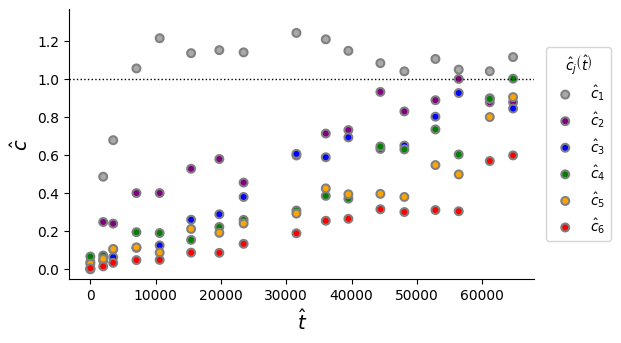

In [28]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

PhysicalParams(L=2.54, v=3.1734285881550957, n=0.5, sm=30000000.0, k_ads=array([20, 30, 30, 40, 40, 35]), k_des=array([0.005  , 0.0012 , 0.001  , 0.0009 , 0.0006 , 0.00065]), C_0=array([2.66894928, 1.1912988 , 1.82447442, 0.99863034, 1.09163878,
       1.60000643]))

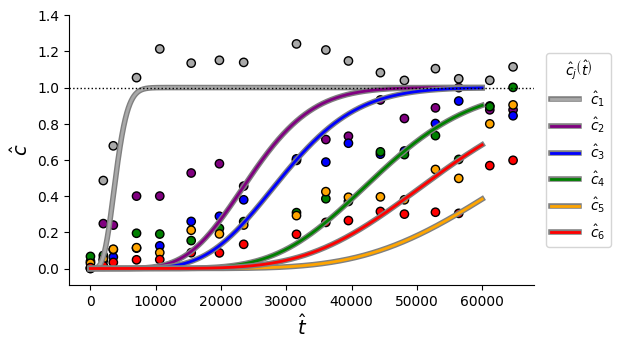

In [74]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=3e7,  # nmol/cm³
    k_ads=(20, 30, 30, 40, 40, 35),  # 1/min
    k_des=(0.0050, 0.0012, 0.0010, 0.0009, 0.0006, 0.00065),  # 1/min
    C_0=c_0,
)

display(p)

sim = Simulation(**p.nondim)
sim.end_time = 60_000  # Pore volumes
sim.cfl = 0.85
sim.write_every = 2000
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [76]:
experimental_data.print_observations_OSTRICH()

obs0	0.0009	1.00	results.dat	OST_NULL	0	1
obs1	0.4863	1.00	results.dat	OST_NULL	1	1
obs2	0.6783	1.00	results.dat	OST_NULL	2	1
obs3	1.0553	1.00	results.dat	OST_NULL	3	1
obs4	1.2140	1.00	results.dat	OST_NULL	4	1
obs5	1.1355	1.00	results.dat	OST_NULL	5	1
obs6	1.1512	1.00	results.dat	OST_NULL	6	1
obs7	1.1396	1.00	results.dat	OST_NULL	7	1
obs8	1.2417	1.00	results.dat	OST_NULL	8	1
obs9	1.2081	1.00	results.dat	OST_NULL	9	1
obs10	1.1476	1.00	results.dat	OST_NULL	10	1
obs11	1.0829	1.00	results.dat	OST_NULL	11	1
obs12	1.0400	1.00	results.dat	OST_NULL	12	1
obs13	1.1049	1.00	results.dat	OST_NULL	13	1
obs14	1.0490	1.00	results.dat	OST_NULL	14	1
obs15	1.0405	1.00	results.dat	OST_NULL	15	1
obs16	1.1149	1.00	results.dat	OST_NULL	16	1
obs17	0.0390	1.00	results.dat	OST_NULL	17	1
obs18	0.2483	1.00	results.dat	OST_NULL	18	1
obs19	0.2400	1.00	results.dat	OST_NULL	19	1
obs20	0.4003	1.00	results.dat	OST_NULL	20	1
obs21	0.4005	1.00	results.dat	OST_NULL	21	1
obs22	0.5280	1.00	results.dat	OST_NULL	22	1
obs23	0.

In [75]:
# # Fitting data using OSTRICH

# optimal_parameter_set = [
#     3.705345e00,
#     1.887071e00,
#     1.685240e00,
#     1.436330e00,
#     1.359376e00,
#     1.576151e00,
#     1.665684e00,
#     3.272786e-01,
#     -4.030993e-01,
#     -1.094597e00,
#     -1.564712e00,
#     -1.785850e00,
#     -1.878034e00,
# ]

# optimal_parameter_set = [10**k for k in optimal_parameter_set]

# p = PhysicalParams(
#     L=lenght,
#     v=pore_velocity,
#     n=porosity,
#     sm=optimal_parameter_set[0],
#     k_ads=optimal_parameter_set[1:7],
#     k_des=optimal_parameter_set[7:],
#     C_0=experimental_data.c_0,
# )

# sim = Simulation(**p.nondim)
# sim.end_time = 980
# sim.cfl = 0.9
# sim.solve()

# display(plot_btc_and_data(sim, experimental_data))

In [ ]:
# display(p)

In [ ]:
# for k, v in p.nondim.items():
#     print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")